파일을 성공적으로 읽었습니다.


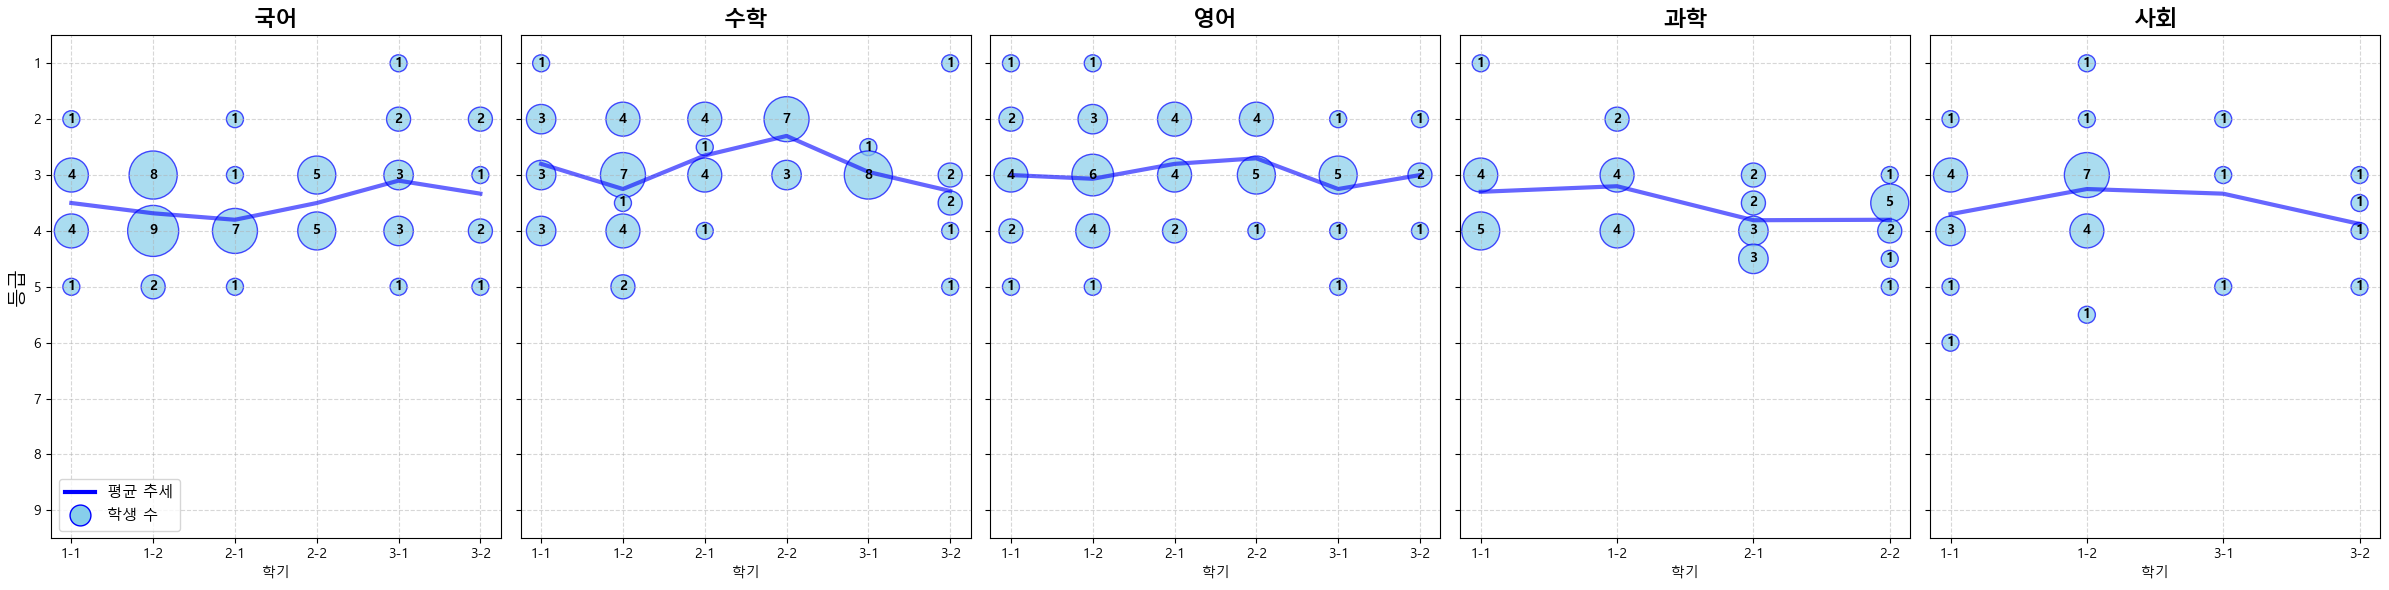

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import platform
from matplotlib.lines import Line2D # 범례 커스텀

# 2. 데이터 불러오기
file_name = '컴과_학종_석차등급.xlsx'
try:
    df = pd.read_excel(file_name)
    print("파일을 성공적으로 읽었습니다.")
except FileNotFoundError:
    print(f"'{file_name}' 파일을 찾을 수 없습니다.")
    raise

# 3. 데이터 전처리
semesters = ['1-1', '1-2', '2-1', '2-2', '3-1', '3-2']
subject_keywords = {
    '국어': ['국어'], '수학': ['수학'], '영어': ['영어'],
    '사회': ['통사', '사탐', '한국사', '윤리', '지리', '역사', '일반사회'], 
    '과학': ['통과', '과탐', '물', '화', '생', '지']
}

long_data = []
for idx, row in df.iterrows():
    for sem in semesters:
        for subj_name, keywords in subject_keywords.items():
            relevant_cols = [c for c in df.columns if c.startswith(sem) and any(k in c[len(sem):] for k in keywords)]
            
            grades = []
            for col in relevant_cols:
                val = row[col]
                if pd.notnull(val):
                    try: grades.append(float(val))
                    except: pass
            
            if grades:
                avg_grade = np.mean(grades)
                # 등급을 0.5 단위로 그룹화 (시각화 깔끔하게)
                rounded_grade = round(avg_grade * 2) / 2
                
                long_data.append({
                    '학기': sem,
                    '과목': subj_name,
                    '등급': rounded_grade,
                    '실제등급': avg_grade
                })

df_plot = pd.DataFrame(long_data)

# 4. 그래프 그리기
fig, axes = plt.subplots(1, 5, figsize=(24, 6), sharey=True)
subjects_order = ['국어', '수학', '영어', '과학', '사회']

for i, subject in enumerate(subjects_order):
    ax = axes[i]
    if subject in df_plot['과목'].unique():
        subset = df_plot[df_plot['과목'] == subject].copy()
        subset['학기'] = pd.Categorical(subset['학기'], categories=semesters, ordered=True)
        
        # observed=True 추가하여 학생수 0인 데이터 표기 제외
        counts = subset.groupby(['학기', '등급'], observed=True).size().reset_index(name='count')
        
        # 버블 차트 그리기
        ax.scatter(counts['학기'], counts['등급'], 
                   s=counts['count'] * 150, 
                   color='skyblue', alpha=0.7, edgecolors='blue')
        
        # 점 안에 숫자 적기
        for _, row in counts.iterrows():
            ax.text(row['학기'], row['등급'], str(row['count']), 
                    ha='center', va='center', fontsize=10, fontweight='bold', color='black')
            
        # 평균 추세선 그리기
        avg_trend = subset.groupby('학기', observed=True)['실제등급'].mean().reset_index()
        ax.plot(avg_trend['학기'], avg_trend['실제등급'], color='blue', linewidth=3, alpha=0.6)

    ax.set_title(f'{subject}', fontsize=16, fontweight='bold')
    ax.set_ylim(9.5, 0.5)
    ax.set_yticks(range(1, 10))
    ax.set_xlabel('학기')
    ax.grid(True, linestyle='--', alpha=0.5)
    
    if i == 0:
        ax.set_ylabel('등급', fontsize=14)
        
        # 범례
        legend_elements = [
            Line2D([0], [0], color='blue', lw=3, label='평균 추세'),
            Line2D([0], [0], marker='o', color='w', label='학생 수',
                   markerfacecolor='skyblue', markeredgecolor='blue', markersize=15)
        ]
        ax.legend(handles=legend_elements, loc='lower left', fontsize=11)

plt.tight_layout()
plt.show()

파일을 성공적으로 읽었습니다.


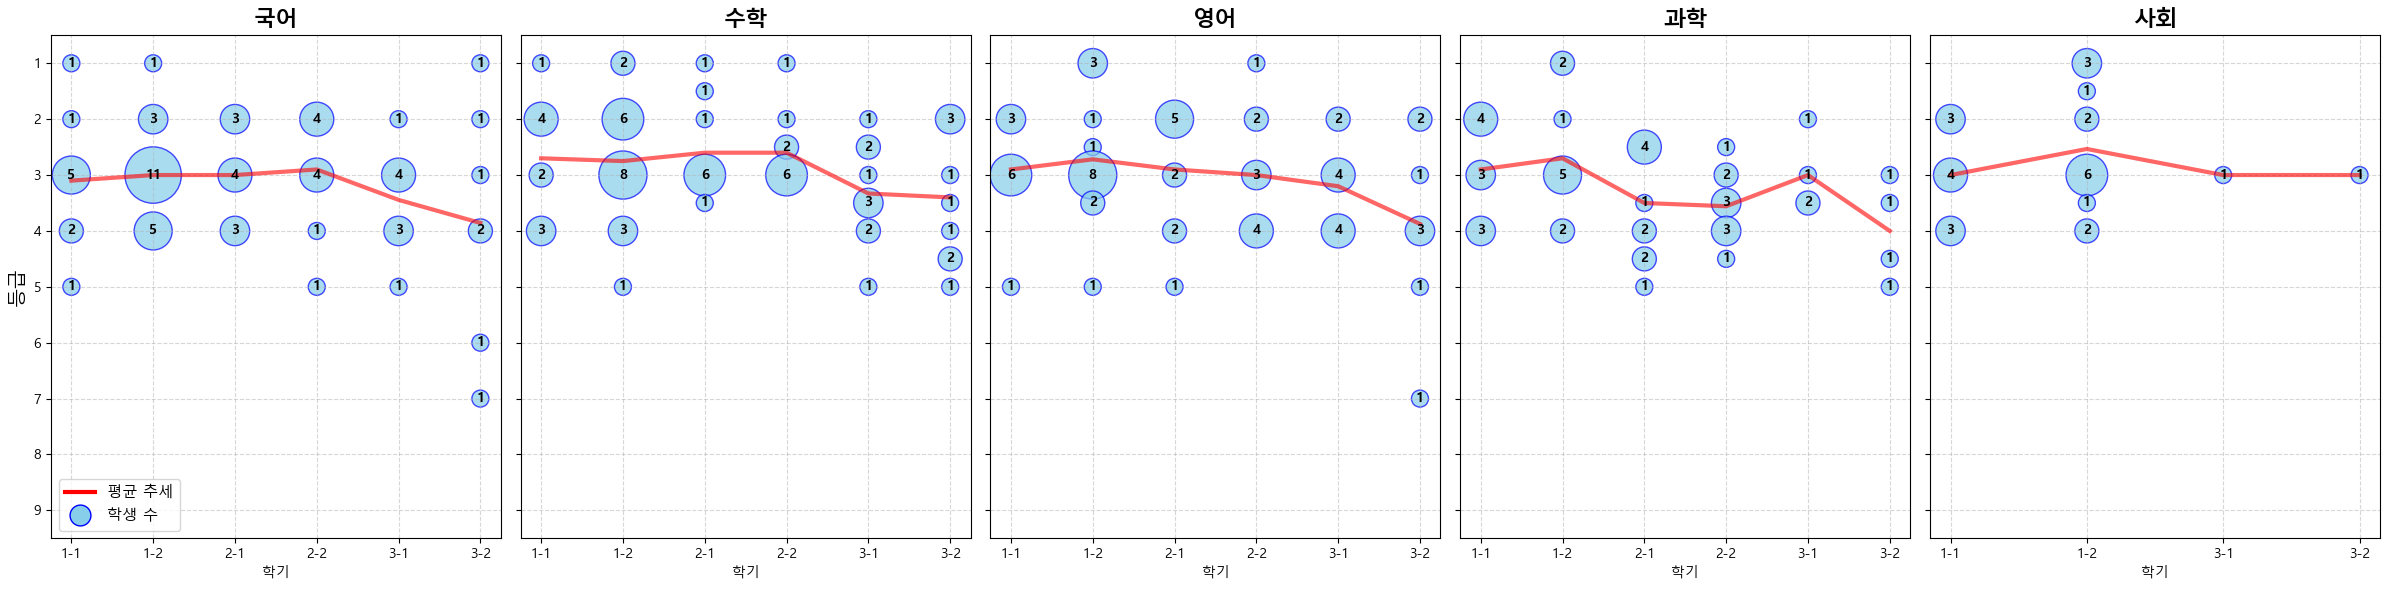

In [36]:
# 2. 데이터 불러오기
file_name = '컴과_교과_석차등급.xlsx'
try:
    df = pd.read_excel(file_name)
    print("파일을 성공적으로 읽었습니다.")
except FileNotFoundError:
    print(f"'{file_name}' 파일을 찾을 수 없습니다.")
    raise

# 3. 데이터 전처리
semesters = ['1-1', '1-2', '2-1', '2-2', '3-1', '3-2']
subject_keywords = {
    '국어': ['국어'], '수학': ['수학'], '영어': ['영어'],
    '사회': ['통사', '사탐', '한국사', '윤리', '지리', '역사', '일반사회'], 
    '과학': ['통과', '과탐', '물', '화', '생', '지']
}

long_data = []
for idx, row in df.iterrows():
    for sem in semesters:
        for subj_name, keywords in subject_keywords.items():
            relevant_cols = [c for c in df.columns if c.startswith(sem) and any(k in c[len(sem):] for k in keywords)]
            
            grades = []
            for col in relevant_cols:
                val = row[col]
                if pd.notnull(val):
                    try: grades.append(float(val))
                    except: pass
            
            if grades:
                avg_grade = np.mean(grades)
                # 등급을 0.5 단위로 그룹화 (시각화 깔끔하게)
                rounded_grade = round(avg_grade * 2) / 2
                
                long_data.append({
                    '학기': sem,
                    '과목': subj_name,
                    '등급': rounded_grade,
                    '실제등급': avg_grade
                })

df_plot = pd.DataFrame(long_data)

# 4. 그래프 그리기
fig, axes = plt.subplots(1, 5, figsize=(24, 6), sharey=True)
subjects_order = ['국어', '수학', '영어', '과학', '사회']

for i, subject in enumerate(subjects_order):
    ax = axes[i]
    if subject in df_plot['과목'].unique():
        subset = df_plot[df_plot['과목'] == subject].copy()
        subset['학기'] = pd.Categorical(subset['학기'], categories=semesters, ordered=True)
        
        # observed=True 추가하여 학생수 0인 데이터 표기 제외
        counts = subset.groupby(['학기', '등급'], observed=True).size().reset_index(name='count')
        
        # 버블 차트 그리기
        ax.scatter(counts['학기'], counts['등급'], 
                   s=counts['count'] * 150, 
                   color='skyblue', alpha=0.7, edgecolors='blue')
        
        # 점 안에 숫자 적기
        for _, row in counts.iterrows():
            ax.text(row['학기'], row['등급'], str(row['count']), 
                    ha='center', va='center', fontsize=10, fontweight='bold', color='black')
            
        # 평균 추세선 그리기
        avg_trend = subset.groupby('학기', observed=True)['실제등급'].mean().reset_index()
        ax.plot(avg_trend['학기'], avg_trend['실제등급'], color='red', linewidth=3, alpha=0.6)

    ax.set_title(f'{subject}', fontsize=16, fontweight='bold')
    ax.set_ylim(9.5, 0.5)
    ax.set_yticks(range(1, 10))
    ax.set_xlabel('학기')
    ax.grid(True, linestyle='--', alpha=0.5)
    
    if i == 0:
        ax.set_ylabel('등급', fontsize=14)
        
        # 범례
        legend_elements = [
            Line2D([0], [0], color='red', lw=3, label='평균 추세'),
            Line2D([0], [0], marker='o', color='w', label='학생 수',
                   markerfacecolor='skyblue', markeredgecolor='blue', markersize=15)
        ]
        ax.legend(handles=legend_elements, loc='lower left', fontsize=11)

plt.tight_layout()
plt.show()

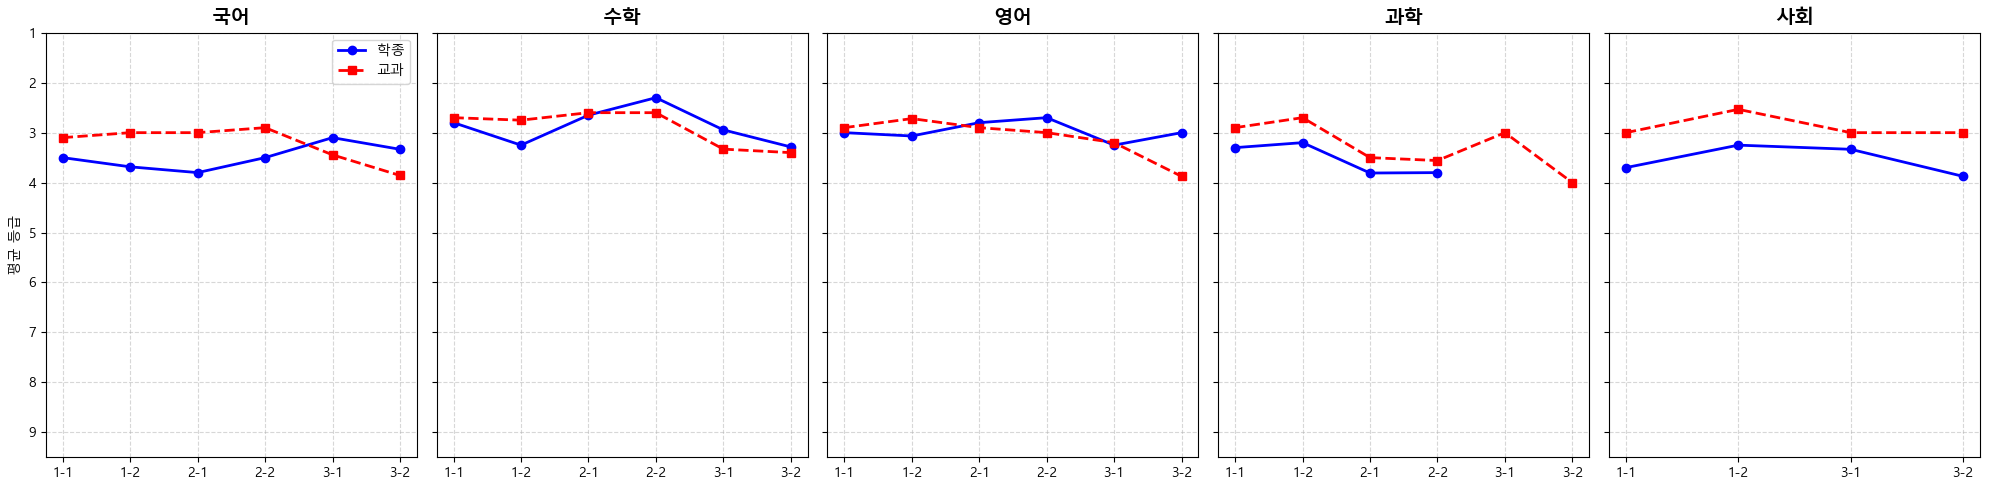

In [38]:
# 2. 두 파일 불러오기
file_1 = '컴과_학종_석차등급.xlsx'
file_2 = '컴과_교과_석차등급.xlsx'

df1 = pd.read_excel(file_1)
df2 = pd.read_excel(file_2)

# 3. 평균 계산 함수
def calculate_average(df):
    semesters = ['1-1', '1-2', '2-1', '2-2', '3-1', '3-2']
    subject_keywords = {
        '국어': ['국어'], '수학': ['수학'], '영어': ['영어'],
        '사회': ['통사', '사탐', '한국사', '윤리', '지리', '역사', '일반사회'], 
        '과학': ['통과', '과탐', '물', '화', '생', '지']
    }
    long_data = []
    for idx, row in df.iterrows():
        for sem in semesters:
            for subj_name, keywords in subject_keywords.items():
                cols = [c for c in df.columns if c.startswith(sem) and any(k in c[len(sem):] for k in keywords)]
                grades = [float(row[c]) for c in cols if pd.notnull(row[c]) and str(row[c]).replace('.','').isdigit()]
                if grades:
                    long_data.append({'학기': sem, '과목': subj_name, '등급': np.mean(grades)})
                    
    df_temp = pd.DataFrame(long_data)
    # 과목/학기별 평균 산출
    return df_temp.groupby(['과목', '학기'])['등급'].mean().reset_index()

# 각각 평균 데이터 만들기
avg_1 = calculate_average(df1)
avg_2 = calculate_average(df2)

# 4. 비교 그래프 그리기
fig, axes = plt.subplots(1, 5, figsize=(20, 5), sharey=True)
subjects = ['국어', '수학', '영어', '과학', '사회']
semesters = ['1-1', '1-2', '2-1', '2-2', '3-1', '3-2']

for i, subject in enumerate(subjects):
    ax = axes[i]
    
    # 첫 번째 파일(학종) 그리기 - blue
    d1 = avg_1[avg_1['과목'] == subject].copy()
    d1['학기'] = pd.Categorical(d1['학기'], categories=semesters, ordered=True)
    d1 = d1.sort_values('학기')
    ax.plot(d1['학기'], d1['등급'], marker='o', color='blue', linewidth=2, label='학종')
    
    # 두 번째 파일(교과) 그리기 - red
    d2 = avg_2[avg_2['과목'] == subject].copy()
    d2['학기'] = pd.Categorical(d2['학기'], categories=semesters, ordered=True)
    d2 = d2.sort_values('학기')
    ax.plot(d2['학기'], d2['등급'], marker='s', color='red', linewidth=2, linestyle='--', label='교과')

    ax.set_title(subject, fontsize=14, fontweight='bold')
    ax.set_ylim(9.5, 1) # 1등급이 위로
    ax.grid(True, linestyle='--', alpha=0.5)
    
    if i == 0:
        ax.legend() # 첫 번째 그래프에만 범례 표시
        ax.set_ylabel('평균 등급')

plt.tight_layout()
plt.show()